In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/tmp/"
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0319/" # two mixture, tanh, 0.0001, 200 epochs
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0320/" # two mixture, tanh, 0.0001, 250 epochs
# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0329/" # two mixture, tanh, 0.0001, 300 epochs

# results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_0001_0405/" # two mixture, tanh, 0.0001, 450 epochs

results_dir = "/mnt/fs5/nclkong/information_bottleneck/gaussian_001_0405/" # two mixture, tanh, 0.01, 300 epochs

In [3]:
def plot_hist_output(epoch):
    vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
    print(vals.shape, vals.mean())
    plt.figure()
    plt.hist(vals, range=[-1.5,1.5], bins=150)
    plt.grid(True)

def plot_hist_over_epochs(epochs):
    num_bins = 150
    for epoch in epochs:
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch))
        hist, _ = np.histogram(vals, range=[-1.5,1.5], bins=num_bins)
        xmin = np.min(vals)
        xmax = np.max(vals)
        x = np.linspace(-1.5, 1.5, num_bins)
        plt.plot(x, hist, label="Epoch {}".format(epoch))
        plt.xlim(-1.5,1.5)
        plt.legend()
    plt.grid(True)

def plot_hist_top_view_output(num_epochs):
    num_bins = 100
    points = 1000
    plt.figure(figsize=(10,5))
    for epoch in range(num_epochs):
        vals = np.load(results_dir + "epoch_{}_outputs_noise.npy".format(epoch+1))
        hist, bins = np.histogram(vals, range=[-1.5,1.5], bins=num_bins)
        total_points = np.sum(hist)
#         assert total_points == points, "Error:{}".format(total_points)
        
        i = 0
        colours = list()
        for b in range(bins.shape[0]-1):
            c = plt.cm.jet(hist[i]/float(total_points)*30)
            colours.append(c)
            i += 1
            
        epoch_vals = np.tile(epoch, bins[:num_bins].shape)
        plt.scatter(epoch_vals, bins[:num_bins], color=colours)
    plt.xlabel("Epoch")
    plt.ylabel(r"PDF of $T_1(k)$")

def plot_acc():
    vals = np.load(results_dir + "accuracies.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True)
    
def plot_mutual_info():
    vals = np.load(results_dir + "mutual_information.npy")
    plt.figure(figsize=(10,5))
    plt.plot(vals)
    plt.ylabel("Mutual Information")
    plt.xlabel("Epoch")
    plt.grid(True)

((1000, 1), 0.001053059)


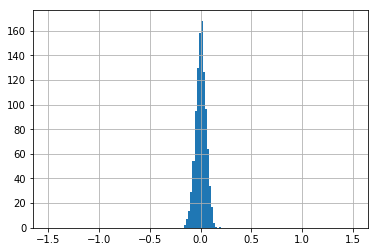

In [4]:
plot_hist_output(1)

((1000, 1), 0.0027930895)


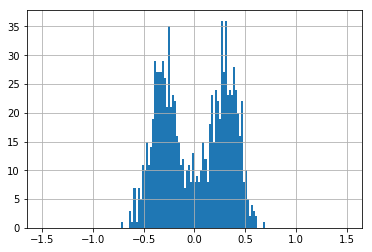

In [5]:
plot_hist_output(5)

((1000, 1), -0.027093789)


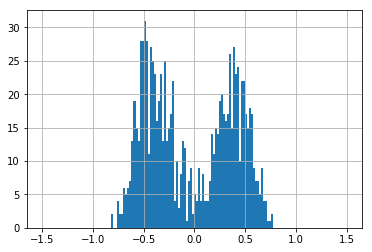

In [6]:
plot_hist_output(10)

((1000, 1), -6.771088e-05)


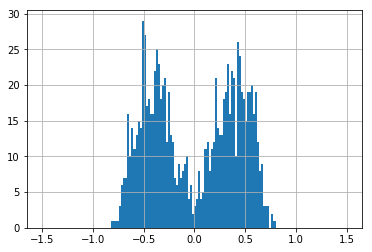

In [7]:
plot_hist_output(15)

((1000, 1), 0.009524776)


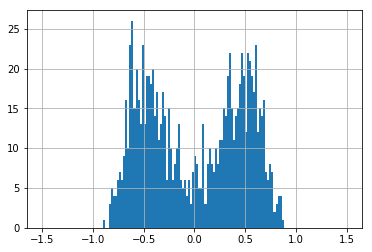

In [8]:
plot_hist_output(50)

((1000, 1), -0.004646196)


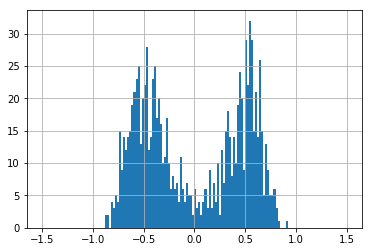

In [9]:
plot_hist_output(60)

((1000, 1), -0.0071711615)


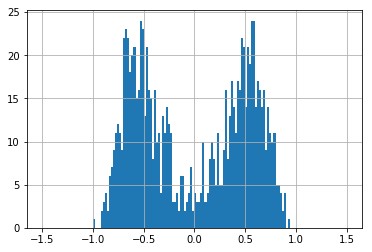

In [10]:
plot_hist_output(100)

((1000, 1), 0.013976405)


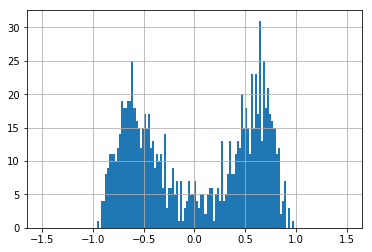

In [11]:
plot_hist_output(150)

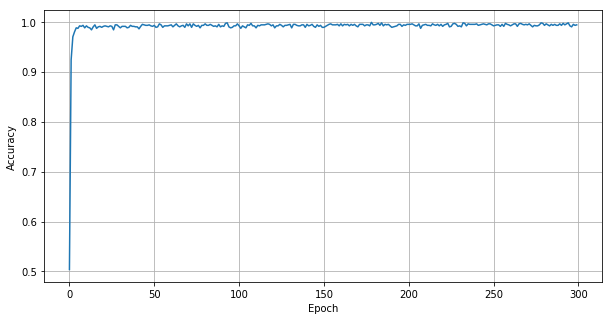

In [12]:
plot_acc()

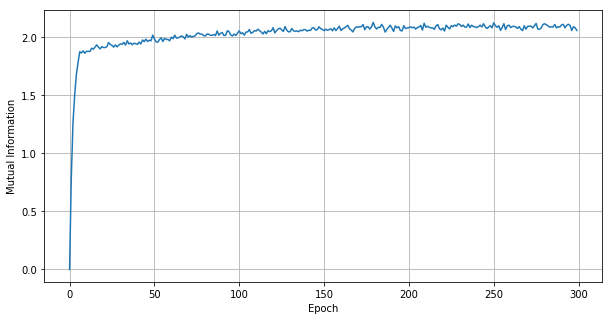

In [13]:
plot_mutual_info()
plt.savefig("/home/nclkong/information_bottleneck/figures/mi_mix_gaussian.png")

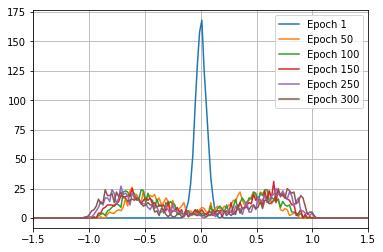

In [14]:
# plot_hist_over_epochs(np.arange(5)+1)
plot_hist_over_epochs([1,50,100,150,250,300])

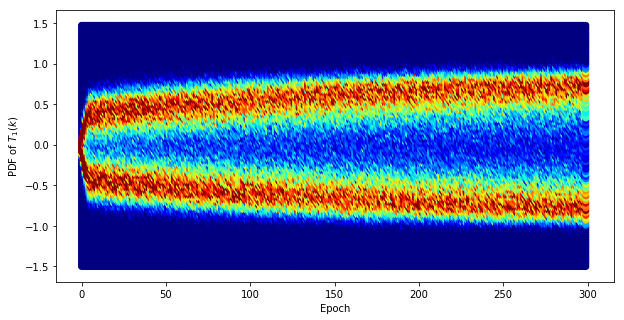

In [15]:
plot_hist_top_view_output(300)
plt.savefig("/home/nclkong/information_bottleneck/figures/pdf_mix_gaussian.png")